###### 2020-11-06 금요일
###### 2020-11-07 토요일

# 01_Tensorflow2.0_(1)

   - tensorflow2.0을 가지고 간단한 실습을 진행해보자
   - 딥러닝은 자연어처리, 영상처리에 많이 사용되기 때문에 자연어 처리를 하려면 잘 해놓자

### 목차

#### 1. 데이터정제

#### 2. Train / Test 분할

#### 3. 정규화

#### 4. 딥러닝

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(tf.__version__)

2.1.0


##### 다음 데이터 셋으로 딥러링을 학습시켜 연비(mpg)를 예측해보자
- Auto MPG Dataset

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


'C:\\Users\\lan41\\.keras\\datasets\\auto-mpg.data'

In [6]:
raw_dataset = pd.read_csv(dataset_path, header=None, sep='\s+')
columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower', 'weight' , 'acceleration', 'model year', 'origin' , 'name']
raw_dataset.columns = columns

In [7]:
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
copy_df = raw_dataset.copy()

In [9]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 1. 데이터정제

##### `horsepower`

In [10]:
# 데이터정제
# horsepower칼럼에 `?` 가존재
copy_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
copy_df['horsepower'] = copy_df['horsepower'].replace('?', np.NaN).apply(float)

In [12]:
copy_df.isna().apply(sum)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [13]:
copy_df = copy_df.dropna(subset=['horsepower'], axis=0, inplace=False)

In [14]:
copy_df.shape

(392, 9)

##### `origin`

 - 숫자형으로 되어있기 때문에 

In [15]:
copy_df['origin'] = copy_df['origin'].astype(str)

In [16]:
copy_df.pop('name')
copy_df = pd.get_dummies(copy_df)

In [17]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin_1      392 non-null    uint8  
 8   origin_2      392 non-null    uint8  
 9   origin_3      392 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 25.6 KB


## 2. Train / Test 분할
   - tensorflow와 sklearn의 함수를 같이 쓰는 경우는 본적이 없다.
   - 그래서 tensorlow를 이용해 딥러닝을 사용하면서 sklearn의 train_test_split을 사용하지 않는편이 좋다
   - 그러므로 sklearn을 이용해 train / test를 나누는 것이 아니라, pandas의 sample 함수를 이용하여 train / test를 나눈다

In [18]:
train_set = copy_df.sample(frac=0.8, random_state=0)
test_set = copy_df.drop(train_set.index)

In [20]:
y_train = train_set.pop('mpg')
y_test  = test_set.pop('mpg')
X_train = train_set
X_test  = test_set 

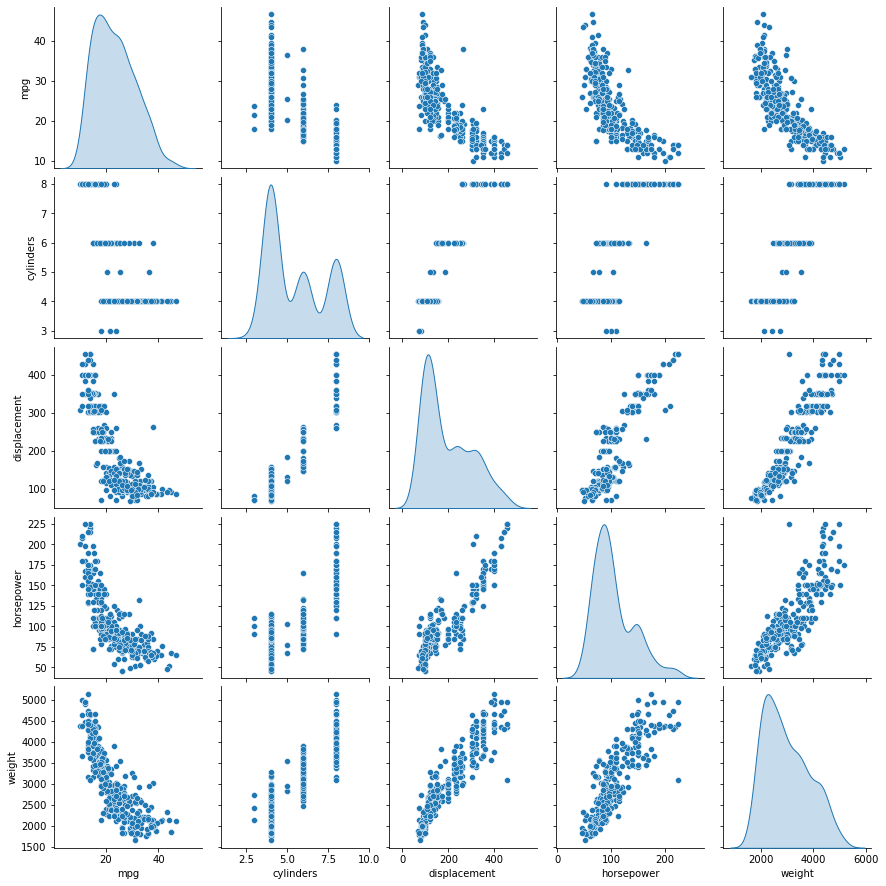

In [19]:
sns.pairplot(train_set[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']], diag_kind='kde')

## 3. 정규화
   - 딥러닝은 Feature를 딥러닝에 넣어 학습시키기 전에 정규화 과정이 필요하다
   - 왜냐??
       - 딥러닝은 비용함수(에러)를 작게하는 지점을 찾기위해 **경사하강법**을 사용하는데 정규화하지 않은 데이터의 경우 비용함수(에러)를 작게하는 지점을 찾기가 정규화를 한 경우보다 어렵다. 그러므로 수행속도가 더욱 오래 걸리기에 정규화를 하는 것이 필수라 할 수 있다.

In [21]:
train_stats= X_train.describe().T

print(train_stats['mean'])
print(train_stats['std'])

cylinders          5.477707
displacement     195.318471
horsepower       104.869427
weight          2990.251592
acceleration      15.559236
model year        75.898089
origin_1           0.624204
origin_2           0.178344
origin_3           0.197452
Name: mean, dtype: float64
cylinders         1.699788
displacement    104.331589
horsepower       38.096214
weight          843.898596
acceleration      2.789230
model year        3.675642
origin_1          0.485101
origin_2          0.383413
origin_3          0.398712
Name: std, dtype: float64


###### 데이터 정규화
   - 정규화는 Train set의 평균 분산을 사용하여 Train set과 Test set의 정규화를 진행하여야한다.
   - sklearn에서 정규화를 위해 `StandardScaler()`함수를 사용할때도 설명했지만, 다시설명 하자면..
       - 머신러닝과 딥러닝은 Train set으로만 학습시켜야한다.
       - 그렇기 때문에 Train set + Test set의 평균 분산을 사용하여 정규화를 진행한다면, 어떤 형식으로든 Test set의 정보가 포함되어 머신러닝 또는 딥러닝을 학습시키는 것과 같다.
       - 그렇다고, Train set의 평균 분산을 사용하여 Train set을 정규화하고, Test set의 평균 분산을 사용하여 Test set을 정규화해서도 안된다.
       - 정석적인 방법은 Train set의 평균 분산을 이용해 Train set과 Test set을 정규화하여야 한다.

In [22]:
# 데이터 정규화

def norm(train, test):
    train_stats = train.describe().T
    
    norm_train = (train - train_stats['mean']) / train_stats['std']
    norm_test  = (test - train_stats['mean']) / train_stats['std']
    
    return norm_train, norm_test

In [23]:
X_train_norm, X_test_norm = norm(X_train, X_test)

## 4. 딥러닝

##### 딥러닝 모델 구현하기

   - 1. `Sequential`로 모델을 만들자
       - 우리의 경우 입력층(노드64), 히든층(노드64), 출력층(노드1)으로 총 3층으로 이룬 모델을 구축할 것이다.
   - 2. `optimizers` : 딥러닝 모델의 학습 방식을 지정해 주는것이다. 자세한 방법은 구글링을 해주길 바란다.
   - 3. `compile` : 딥러닝의 학습방식과 주요 성능지표로 삼을 오차를 지정해준다.
   

In [27]:
# 모델 만들기


# 딥러닝 계츨 구조 구축
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_set.keys())]),   # 은닉층
    layers.Dense(64, activation='relu'),   #
    layers.Dense(1)  # 출력층
])

optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss      = 'mse',
              optimizer = optimizer,  # 딥러닝 학습방식을 설정해주 
              metrics   = ['mae', 'mse'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


##### Train set을 이용하여 딥러닝 학습하기

 - `.fit()`을 이용하여 딥러닝을 학습시키자

In [32]:
leaning_history = model.fit(X_train_norm, y_train,
                            epochs           = 200,  # 딥러닝을 200번 학습시킨다
                            validation_split = 0.2,   # train과 valdation을 8:2로 나눈다
                            verbose          = 1) # 딥러닝 학습과정을 출력한다


Train on 251 samples, validate on 63 samples
Epoch 1/200
251/251 [==============================] - 0s 834us/sample - loss: 409.8833 - mae: 18.8904 - mse: 409.8833 - val_loss: 375.7532 - val_mae: 17.9686 - val_mse: 375.7532
Epoch 2/200
251/251 [==============================] - 0s 194us/sample - loss: 345.6094 - mae: 17.2048 - mse: 345.6093 - val_loss: 304.1279 - val_mae: 15.9886 - val_mse: 304.1279
Epoch 3/200
251/251 [==============================] - 0s 193us/sample - loss: 279.4465 - mae: 15.3127 - mse: 279.4465 - val_loss: 232.9413 - val_mae: 13.7552 - val_mse: 232.9413
Epoch 4/200
251/251 [==============================] - 0s 190us/sample - loss: 215.2164 - mae: 13.2319 - mse: 215.2164 - val_loss: 169.3727 - val_mae: 11.4328 - val_mse: 169.3727
Epoch 5/200
251/251 [==============================] - 0s 175us/sample - loss: 158.2562 - mae: 11.0644 - mse: 158.2562 - val_loss: 116.8477 - val_mae: 9.2829 - val_mse: 116.8477
Epoch 6/200
251/251 [==============================] - 0s 203

251/251 [==============================] - 0s 176us/sample - loss: 7.1283 - mae: 1.8924 - mse: 7.1283 - val_loss: 9.2194 - val_mae: 2.2788 - val_mse: 9.2194
Epoch 49/200
251/251 [==============================] - 0s 183us/sample - loss: 7.0834 - mae: 1.8734 - mse: 7.0834 - val_loss: 9.2844 - val_mae: 2.2934 - val_mse: 9.2844
Epoch 50/200
251/251 [==============================] - 0s 182us/sample - loss: 7.1599 - mae: 1.9091 - mse: 7.1599 - val_loss: 9.4401 - val_mae: 2.3924 - val_mse: 9.4401
Epoch 51/200
251/251 [==============================] - 0s 174us/sample - loss: 7.0297 - mae: 1.8719 - mse: 7.0297 - val_loss: 9.4121 - val_mae: 2.2762 - val_mse: 9.4121
Epoch 52/200
251/251 [==============================] - 0s 247us/sample - loss: 6.9598 - mae: 1.8681 - mse: 6.9598 - val_loss: 9.0324 - val_mae: 2.2678 - val_mse: 9.0324
Epoch 53/200
251/251 [==============================] - 0s 302us/sample - loss: 6.9599 - mae: 1.8615 - mse: 6.9599 - val_loss: 9.0451 - val_mae: 2.3123 - val_mse: 

251/251 [==============================] - 0s 171us/sample - loss: 6.3438 - mae: 1.7542 - mse: 6.3438 - val_loss: 8.9495 - val_mae: 2.2618 - val_mse: 8.9495
Epoch 97/200
251/251 [==============================] - 0s 184us/sample - loss: 6.1266 - mae: 1.7160 - mse: 6.1266 - val_loss: 8.7004 - val_mae: 2.2513 - val_mse: 8.7004
Epoch 98/200
251/251 [==============================] - 0s 127us/sample - loss: 6.1606 - mae: 1.7571 - mse: 6.1606 - val_loss: 8.8420 - val_mae: 2.2968 - val_mse: 8.8420
Epoch 99/200
251/251 [==============================] - 0s 131us/sample - loss: 6.3160 - mae: 1.7444 - mse: 6.3160 - val_loss: 8.8717 - val_mae: 2.2325 - val_mse: 8.8717
Epoch 100/200
251/251 [==============================] - 0s 123us/sample - loss: 6.0891 - mae: 1.7426 - mse: 6.0891 - val_loss: 8.9182 - val_mae: 2.2868 - val_mse: 8.9182
Epoch 101/200
251/251 [==============================] - ETA: 0s - loss: 3.7483 - mae: 1.4696 - mse: 3.748 - 0s 127us/sample - loss: 6.4582 - mae: 1.8150 - mse: 6

Epoch 144/200
251/251 [==============================] - 0s 163us/sample - loss: 5.7779 - mae: 1.7085 - mse: 5.7779 - val_loss: 8.7301 - val_mae: 2.2398 - val_mse: 8.7301
Epoch 145/200
251/251 [==============================] - 0s 155us/sample - loss: 5.7335 - mae: 1.6855 - mse: 5.7335 - val_loss: 8.6544 - val_mae: 2.2409 - val_mse: 8.6544
Epoch 146/200
251/251 [==============================] - 0s 179us/sample - loss: 5.6361 - mae: 1.6442 - mse: 5.6361 - val_loss: 9.3417 - val_mae: 2.4438 - val_mse: 9.3417
Epoch 147/200
251/251 [==============================] - 0s 167us/sample - loss: 5.7004 - mae: 1.6753 - mse: 5.7004 - val_loss: 9.2824 - val_mae: 2.2052 - val_mse: 9.2824
Epoch 148/200
251/251 [==============================] - 0s 179us/sample - loss: 5.7007 - mae: 1.6877 - mse: 5.7007 - val_loss: 8.8260 - val_mae: 2.3705 - val_mse: 8.8260
Epoch 149/200
251/251 [==============================] - 0s 183us/sample - loss: 5.7805 - mae: 1.6877 - mse: 5.7805 - val_loss: 8.8730 - val_mae:

251/251 [==============================] - 0s 136us/sample - loss: 5.7334 - mae: 1.6641 - mse: 5.7334 - val_loss: 8.5702 - val_mae: 2.2179 - val_mse: 8.5702
Epoch 192/200
251/251 [==============================] - 0s 167us/sample - loss: 5.3382 - mae: 1.5951 - mse: 5.3382 - val_loss: 8.8899 - val_mae: 2.1849 - val_mse: 8.8899
Epoch 193/200
251/251 [==============================] - 0s 191us/sample - loss: 5.4110 - mae: 1.6196 - mse: 5.4110 - val_loss: 8.7741 - val_mae: 2.2226 - val_mse: 8.7741
Epoch 194/200
251/251 [==============================] - 0s 164us/sample - loss: 5.3752 - mae: 1.6192 - mse: 5.3752 - val_loss: 8.6267 - val_mae: 2.2350 - val_mse: 8.6267
Epoch 195/200
251/251 [==============================] - 0s 230us/sample - loss: 5.5327 - mae: 1.6457 - mse: 5.5327 - val_loss: 8.5886 - val_mae: 2.2492 - val_mse: 8.5886
Epoch 196/200
251/251 [==============================] - 0s 346us/sample - loss: 5.5562 - mae: 1.6581 - mse: 5.5562 - val_loss: 8.5451 - val_mae: 2.2740 - val_

In [34]:
# 딥러닝의 학습 과정을 데이터프레임으로 만들었다.
hist_df = pd.DataFrame(leaning_history.history)
hist_df.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse
190,5.733416,1.664068,5.733417,8.570188,2.217899,8.570189
191,5.338218,1.595082,5.338217,8.889924,2.184872,8.889924
192,5.411013,1.619579,5.411013,8.774103,2.222605,8.774102
193,5.375184,1.619222,5.375185,8.626695,2.235049,8.626696
194,5.532695,1.645707,5.532695,8.588626,2.249172,8.588625
195,5.556183,1.658062,5.556182,8.545146,2.273958,8.545147
196,5.431943,1.596236,5.431942,8.515410,2.221956,8.515409
197,5.384018,1.591550,5.384017,8.767680,2.216648,8.767679
198,5.474462,1.607604,5.474462,8.539281,2.240962,8.539282
199,5.644505,1.643015,5.644505,8.670918,2.240265,8.670918


##### Test set을 이용하여 예측하고 모델의 성능을 평가해보자

 - `evaluate()`함수를 이용하면 Test set에 대한 예측값과 실제값의 차이(오차)를 알아서 계산해준다.

In [70]:
loss, mae, mse = model.evaluate(X_test_norm, y_test)
print('평균 절대 오차 :', mae)

78/78 [==============================] - 0s 128us/sample - loss: 8.9142 - mae: 2.1373 - mse: 8.9142
평균 절대 오차 : 2.1372955


- 하지만, 예측값 그자체가 필요하다면 머신러닝의 predict와 같은 방법으로 예측을 수행하면 된다

In [35]:
y_pred = model.predict(X_test_norm)

###### 실제값와 예측값의 차이를 시각화 하여 차이점을 한눈에 알아보자

In [36]:
# 시각화
y_pred = model.predict(X_test_norm).flatten()

In [37]:
df = pd.DataFrame({
    'pred' : y_pred,
    'real' : np.array(y_test)
})
df.head()

,pred,real
0,16.313959,15.0
1,10.547772,10.0
2,11.355962,9.0
3,24.196756,25.0
4,20.965286,19.0


<AxesSubplot:>

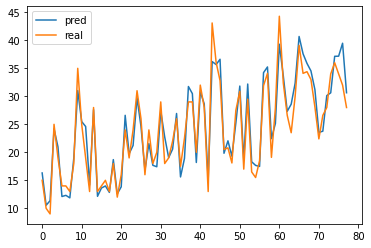

In [38]:
df.plot(kind='line')